#Load

In [54]:
from pathlib import Path
import pandas as pd
import numpy as np
import urllib.request


def load_housing_data():
  sold_file=Path("datasets/sold_melbourne.csv")
  if not sold_file.is_file():
    sold_file.parent.mkdir(parents=True, exist_ok=True)
    url="https://raw.githubusercontent.com/mmercan/handson-ml3/refs/heads/main/data/housing/sold_melbourne.csv"
    urllib.request.urlretrieve(url,sold_file)
  return pd.read_csv(sold_file)

housing = load_housing_data()


housing['price'] = pd.to_numeric(
    housing['price'].replace(r'[\$,]', '', regex=True),
    errors='coerce'
).fillna(0)

housing.info()
housing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   latitude       105119 non-null  float64
 1   longitude      105119 non-null  float64
 2   streetAddress  105120 non-null  object 
 3   suburb         105120 non-null  object 
 4   postcode       105120 non-null  int64  
 5   region         99878 non-null   object 
 6   bedrooms       105120 non-null  int64  
 7   bathrooms      105120 non-null  int64  
 8   parkingSpaces  105120 non-null  int64  
 9   propertyType   105120 non-null  object 
 10  price          105120 non-null  float64
 11  listingId      105120 non-null  int64  
 12  title          105120 non-null  object 
 13  dateSold       105120 non-null  object 
 14  modifiedDate   105120 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 12.0+ MB


,latitude,longitude,streetAddress,suburb,postcode,region,bedrooms,bathrooms,parkingSpaces,propertyType,price,listingId,title,dateSold,modifiedDate
0,-38.276067,144.485488,6 Corymbia Circuit,Barwon Heads,3227,bellarine_peninsula,3,2,2,house,1255000.0,129714950,Luxurious Coastal Lifestyle Awaits,2018-11-06,2018-11-06T02:00:19Z
1,-38.238159,144.545576,9 La Bella Street,Ocean Grove,3226,bellarine_peninsula,4,2,2,house,725000.0,129219294,Laid Back Family Living In An Idyllic Location,2018-11-06,2018-11-06T04:01:41Z
2,-37.638387,144.922701,26 Greensted Grove,Roxburgh Park,3064,melbourne___northern_region,4,2,2,house,670000.0,129517974,Oversized & park-facing,2018-11-06,2018-11-06T02:37:57Z
3,-38.121844,144.332476,80 Calvert Street,Hamlyn Heights,3215,NaN,3,2,1,house,600000.0,129640018,Cherished Family Home In Leafy Hamlyn Heights,2018-11-06,2018-11-06T02:00:19Z
4,-38.129071,144.323640,295 Church Street,Herne Hill,3218,bellarine_peninsula,3,1,2,house,520000.0,129459426,Potential Plus,2018-11-06,2018-11-06T02:00:17Z


In [55]:
housing["region"].value_counts()


,count
region,
western_region,26091
north_east_region,15628
bellarine_peninsula,10480
melbourne_city___greater_region,10454
gippsland,10429
melbourne___northern_region,5404
eastern_melbourne,5317
inner_east_melbourne,5295
south_east_melbourne,5291


In [56]:
housing["propertyType"].value_counts()

,count
propertyType,
house,63195
apartment,20927
unit,15697
townhouse,5273
residential land,10
acreage/semi-rural,8
villa,5
lifestyle,2
farmlet,1


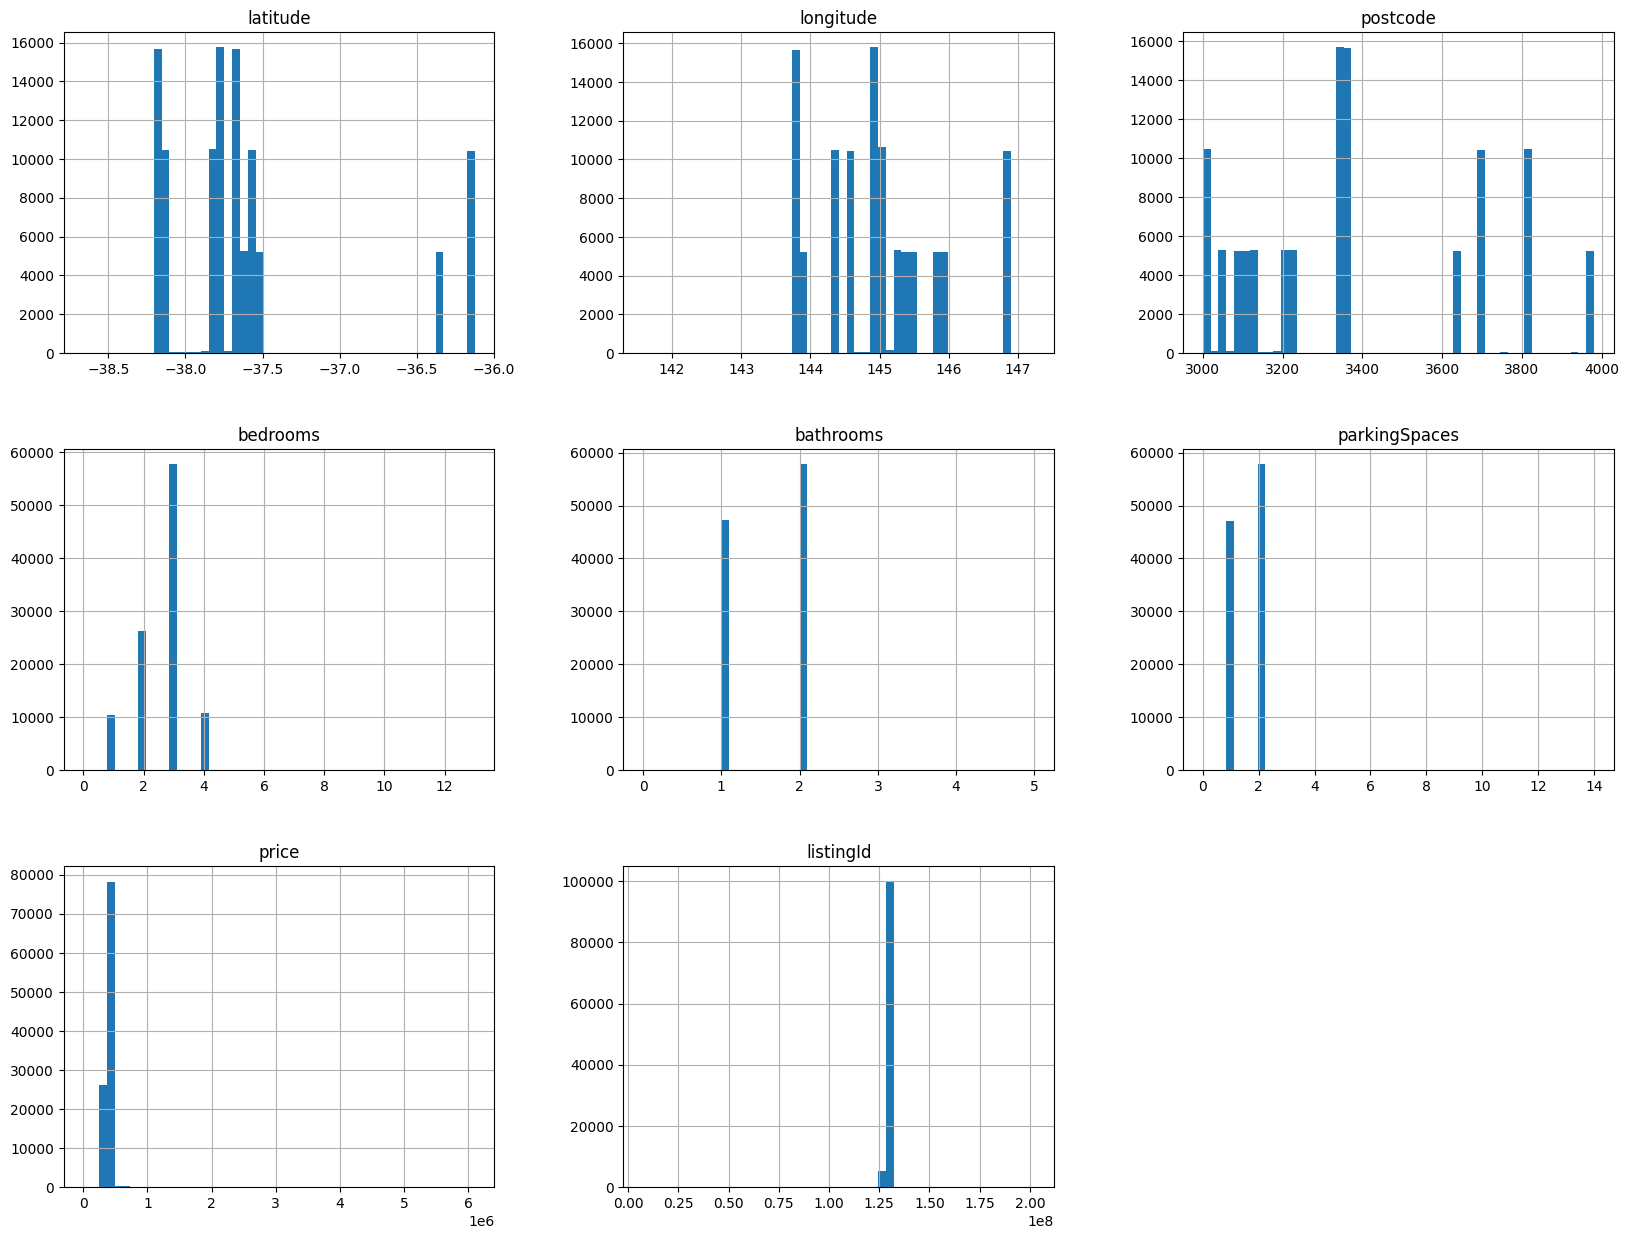

In [57]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [58]:
housing['postcode_cat'] = pd.cut(housing['postcode'],
                               bins=[3000,3100,3200,3300,3400,3500,3600,3700,3800,3900, np.inf],
                                 labels=[30,31,32,33,34,35,36,37,38,39])
housing['postcode_cat'].value_counts()

,count
postcode_cat,
33,31294
30,21154
36,15627
31,10706
32,10531
38,10476
39,5256
37,33
34,21


In [59]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print("train set : ",len(train_set))
print("test set  : ",len(test_set))
test_set.head()

train set :  84096
test set  :  21024


,latitude,longitude,streetAddress,suburb,postcode,region,bedrooms,bathrooms,parkingSpaces,propertyType,price,listingId,title,dateSold,modifiedDate,postcode_cat
103058,-38.202204,145.488849,18 Sybella Avenue,Koo Wee Rup,3981,south_east_melbourne,3,1,1,house,340000.0,129364162,"Charming cottage, great location!",2018-10-26,2018-11-05T17:36:47Z,39
72825,-37.678297,144.584048,4 Hudson Place,Melton,3337,western_region,3,2,2,house,455000.0,129397246,DECEPTIVELY DIFFERENT - 3 BEDROOM PLUS BUNGALOW,2018-10-26,2018-10-30T02:00:25Z,33
86757,-36.138885,146.871923,2 Bourke Crescent,Wodonga,3690,north_east_region,4,2,2,house,345000.0,129326514,Great location a Must ?,2018-10-26,2018-10-29T13:58:43Z,36
72842,-37.581211,143.810411,12 Nimble Drive,Delacombe,3356,western_region,4,2,2,house,470000.0,129427306,"Looking For A Quiet, Private Place To Live?",2018-10-26,2018-10-29T02:00:25Z,33
78121,-37.795230,145.024272,143 Wiltshire Drive,Kew,3101,inner_east_melbourne,2,1,1,apartment,470000.0,129466798,"PREMIER LOCATION, WITHIN EXCLUSIVE WILLSMERE E...",2018-10-26,2018-11-01T13:55:37Z,31


In [60]:
from sklearn.model_selection import StratifiedShuffleSplit

# Drop rows with NaN in 'postcode_cat' before splitting
# removing 2 records which post code is not in the range of 3000-4000
housing_cleaned = housing.dropna(subset=["postcode_cat"]).reset_index(drop=True)

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_split=[]
for train_index, test_index in splitter.split(housing_cleaned, housing_cleaned["postcode_cat"]):
    strat_train_set_n = housing_cleaned.loc[train_index]
    strat_test_set_n = housing_cleaned.loc[test_index]
    # Append both train and test sets as a tuple for each split
    strat_split.append((strat_train_set_n, strat_test_set_n))


display(housing_cleaned.info())
display(housing.info())
# Use the first split for further analysis
strat_train_set, strat_test_set = strat_split[0]
print("train set", len(strat_train_set))
print("test set", len(strat_test_set))
strat_train_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105118 entries, 0 to 105117
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   latitude       105117 non-null  float64 
 1   longitude      105117 non-null  float64 
 2   streetAddress  105118 non-null  object  
 3   suburb         105118 non-null  object  
 4   postcode       105118 non-null  int64   
 5   region         99878 non-null   object  
 6   bedrooms       105118 non-null  int64   
 7   bathrooms      105118 non-null  int64   
 8   parkingSpaces  105118 non-null  int64   
 9   propertyType   105118 non-null  object  
 10  price          105118 non-null  float64 
 11  listingId      105118 non-null  int64   
 12  title          105118 non-null  object  
 13  dateSold       105118 non-null  object  
 14  modifiedDate   105118 non-null  object  
 15  postcode_cat   105118 non-null  category
dtypes: category(1), float64(3), int64(5), object(7)
memory u

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   latitude       105119 non-null  float64 
 1   longitude      105119 non-null  float64 
 2   streetAddress  105120 non-null  object  
 3   suburb         105120 non-null  object  
 4   postcode       105120 non-null  int64   
 5   region         99878 non-null   object  
 6   bedrooms       105120 non-null  int64   
 7   bathrooms      105120 non-null  int64   
 8   parkingSpaces  105120 non-null  int64   
 9   propertyType   105120 non-null  object  
 10  price          105120 non-null  float64 
 11  listingId      105120 non-null  int64   
 12  title          105120 non-null  object  
 13  dateSold       105120 non-null  object  
 14  modifiedDate   105120 non-null  object  
 15  postcode_cat   105118 non-null  category
dtypes: category(1), float64(3), int64(5), object(7)
memory u

None

train set 84094
test set 21024


,latitude,longitude,streetAddress,suburb,postcode,region,bedrooms,bathrooms,parkingSpaces,propertyType,price,listingId,title,dateSold,modifiedDate,postcode_cat
3668,-37.824971,144.962296,65/183 City Road,Southbank,3006,melbourne_city___greater_region,1,1,1,apartment,440000.0,128167750,Southbank Certainty with Oversized Outdoor Ter...,2018-10-26,2018-11-02T14:03:39Z,30
103884,-37.678297,144.584048,4 Hudson Place,Melton,3337,western_region,3,2,2,house,455000.0,129397246,DECEPTIVELY DIFFERENT - 3 BEDROOM PLUS BUNGALOW,2018-10-26,2018-10-30T02:00:25Z,33
85377,-37.605861,143.834587,154 Morgan Street,Sebastopol,3356,western_region,3,2,2,house,330000.0,129621538,Well Maintained Brick Beauty,2018-10-26,2018-11-01T13:56:30Z,33
29774,-37.805097,144.957514,203/24 Cobden Street,North Melbourne,3051,melbourne_city___greater_region,1,1,1,apartment,355000.0,129545546,Exclusive lifestyle and location,2018-10-26,2018-11-01T02:00:26Z,30
73391,-36.369752,145.347311,22 Paisley Crescent,Mooroopna,3629,north_east_region,3,2,2,house,388000.0,129307042,Stylish Living With Bush Outlook,2018-10-26,2018-10-27T14:07:40Z,36
